CAT AND DOG IMAGE CLASSIFIER

In [1]:
import os
import shutil
import random
source_dir = r"C:\Users\Swarathmica\Downloads\archive (3)\cat_dog"
train_data_dir = r"C:\Users\Swarathmica\Downloads\cat_dog\organized_training_set"
validation_data_dir = r"C:\Users\Swarathmica\Downloads\cat_dog\organized_test_set"
for directory in [train_data_dir, validation_data_dir]:
    os.makedirs(os.path.join(directory, 'cats'), exist_ok=True)
    os.makedirs(os.path.join(directory, 'dogs'), exist_ok=True)
split_ratio = 0.8
def organize_images(source_dir, train_dir, validation_dir, split_ratio):
    images = os.listdir(source_dir)
    random.shuffle(images)
    split_index = int(split_ratio * len(images))
    train_images = images[:split_index]
    validation_images = images[split_index:]

    for filename in train_images:
        if 'cat' in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(train_dir, 'cats', filename))
        elif 'dog' in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(train_dir, 'dogs', filename))

    for filename in validation_images:
        if 'cat' in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(validation_dir, 'cats', filename))
        elif 'dog' in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(validation_dir, 'dogs', filename))
organize_images(source_dir, train_data_dir, validation_data_dir, split_ratio)


c:\Users\Swarathmica\AppData\Local\Programs\Python\Python310\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10


c:\Users\Swarathmica\AppData\Local\Programs\Python\Python310\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 337s 531ms/step - accuracy: 0.5429 - loss: 0.6850 - val_accuracy: 0.7051 - val_loss: 0.5732
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 130us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.7810
Epoch 3/10


c:\Users\Swarathmica\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 508ms/step - accuracy: 0.7152 - loss: 0.5561 - val_accuracy: 0.7386 - val_loss: 0.5418
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 1.1074
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 335s 533ms/step - accuracy: 0.7756 - loss: 0.4680 - val_accuracy: 0.8213 - val_loss: 0.3969
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2315
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 312s 498ms/step - accuracy: 0.8147 - loss: 0.4069 - val_accuracy: 0.8397 - val_loss: 0.3621
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0560
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 318s 506ms/step - accuracy: 0.8460 - loss: 0.3478 - val_accuracy: 0.8528 - val_loss: 0.3361
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.0000

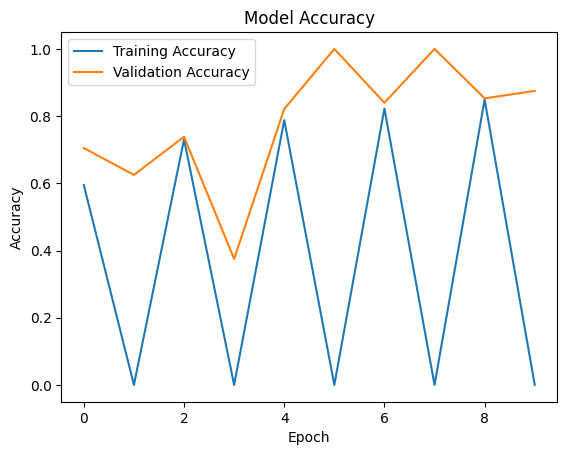

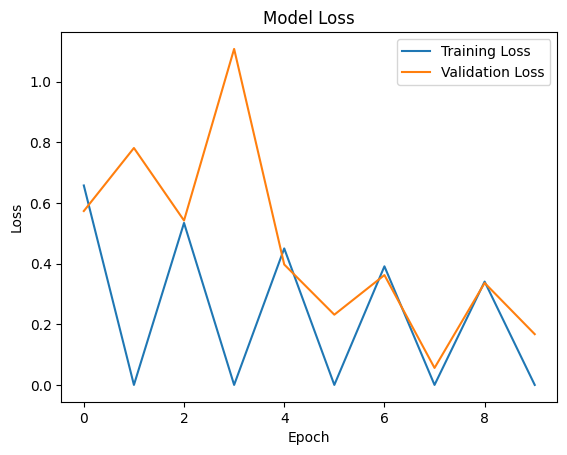

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32
EPOCHS = 10
train_data_dir = r"C:\Users\Swarathmica\Downloads\cat_dog\organized_training_set"
validation_data_dir = r"C:\Users\Swarathmica\Downloads\cat_dog\organized_test_set"
if not os.path.exists(train_data_dir) or not os.path.exists(validation_data_dir):
    raise ValueError("The provided paths to the training or validation directories do not exist.")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary')

if train_generator.samples == 0:
    raise ValueError("No images found in the training directory.")
if validation_generator.samples == 0:
    raise ValueError("No images found in the validation directory.")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


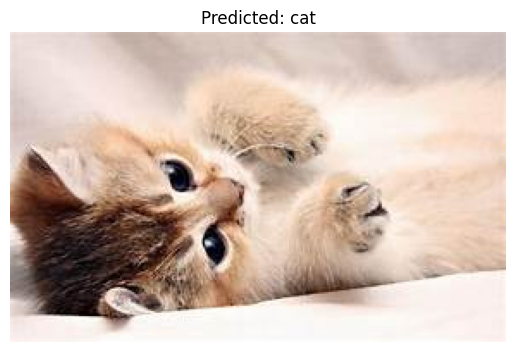

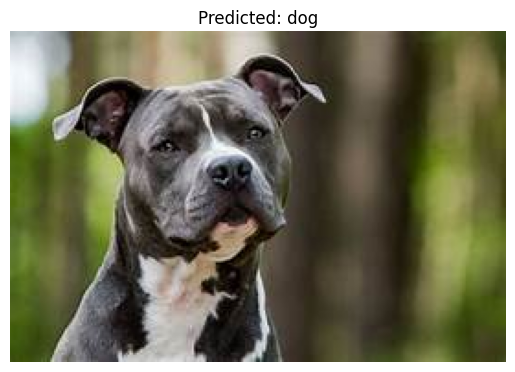

In [3]:
from tensorflow.keras.preprocessing import image 

image_paths = [r"C:\Users\Swarathmica\Downloads\cat.jpeg",r"C:\Users\Swarathmica\Downloads\dog.jpeg"]  # Replace with the paths to your external images
external_images = []

for path in image_paths:
    img = image.load_img(path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    external_images.append(img)
external_images = np.vstack(external_images)
external_images /= 255.0
predictions = model.predict(external_images)
predicted_classes = np.where(predictions > 0.5, 1, 0)
class_labels = ['cat', 'dog']
for i in range(len(image_paths)):
    img_path = image_paths[i]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_labels[predicted_classes[i][0]]}")
    plt.show()
